# Active Learning: Q1 (b): v

In [0]:
'''
Q1(b)v:
From 90% of unlabelled points, randomly pick 40% of the points and use
clustering (using K-means with K=number of class labels). In each cluster,
randomly label 20% of the points to label remaining points in the cluster. How
accurate is the cluster-based labelling? How much saving it results in if each
label costs you Rs. 100 and each labelling takes one hour.
'''

'\nQ1(b)v:\nFrom 90% of unlabelled points, randomly pick 40% of the points and use\nclustering (using K-means with K=number of class labels). In each cluster,\nrandomly label 20% of the points to label remaining points in the cluster. How\naccurate is the cluster-based labelling? How much saving it results in if each\nlabel costs you Rs. 100 and each labelling takes one hour.\n'



---


In this section, we shall be using clustering instead of Active Learning for labelling the unlabelled data points.

Clustering algorithm used: **KMeans**

Finally, we shall be evaluating the accuracy and cost & time efficiency of clustering technique over direct labelling.


---




In [0]:
# Importing required libraries

import numpy as np 
import pandas as pd 
import math
from statistics import mean 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn import datasets
from scipy.stats import entropy
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import random

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [0]:
# Loading dataset
X_digits, y_digits = datasets.load_digits(return_X_y=True)
stack = np.vstack((X_digits.T, y_digits.T))
dataset = stack.T

# feature scalling 
sc = StandardScaler() 
dataset[:, :-1] = sc.fit_transform(dataset[:, :-1]) 


In [0]:
# Function for randomly choosing 40% of unlabelled data

def choose_40_percent(unlabel_label):
    data_40_percent = np.array(random.sample(list(unlabel_label), math.floor(unlabel_label.shape[0] * 0.4)))
    return data_40_percent

In [0]:
percent_of_samples = 10
train_size = 0.10
test_size = 0.20

# Obtaining 40% of unlabelled data points for Clustering
x_train, unlabel, y_train, label = train_test_split(X_digits, y_digits, train_size = train_size)
unlabel_label = np.concatenate((unlabel, label.reshape((label.shape[0], 1))), axis =1)
data_40_percent = choose_40_percent(unlabel_label)
kmeans_x_train = data_40_percent[:, :-1]
kmeans_y_train = data_40_percent[:, -1]

In [15]:
# KMeans Clustering for this 40% unlabelled data points
n_clusters = 10
n_samples = kmeans_x_train.shape[0]
n_features = kmeans_x_train.shape[1]

kmeans = KMeans(n_clusters= n_clusters, random_state=0)
kmeans.fit(kmeans_x_train)
kmeans_y_train_pred = kmeans.predict(kmeans_x_train)
# Clustering results
print('Number of Samples points: ' + str(n_samples))
print('Number of Features: ' + str(n_features))
print('Number of Clusters: ' + str(n_clusters))
print()
print('Clustering results for these 40% unlabelled data points: \n')
print(kmeans_y_train_pred)

Number of Samples points: 647
Number of Features: 64
Number of Clusters: 10

Clustering results for these 40% unlabelled data points: 

[1 1 4 0 9 9 9 0 5 2 1 1 1 4 6 7 2 8 0 6 1 6 0 5 1 8 3 4 7 9 5 6 2 5 0 2 3
 3 7 6 1 6 6 1 8 3 9 1 7 9 4 1 3 2 5 8 1 0 1 2 7 1 5 1 4 0 0 2 7 2 7 9 7 5
 9 0 2 6 7 3 1 0 1 0 0 8 9 6 1 1 7 1 6 7 2 7 2 9 9 4 1 4 9 0 3 3 5 7 1 5 9
 8 1 8 3 9 0 6 5 6 1 1 0 9 2 0 2 9 1 9 9 9 0 1 4 8 1 3 9 2 0 9 7 7 3 2 6 9
 6 2 8 8 8 5 2 8 9 8 6 4 7 6 3 4 7 0 2 7 5 7 1 1 2 1 9 8 0 8 0 3 9 9 7 4 3
 0 5 2 4 7 3 2 7 2 4 0 3 1 4 2 3 0 3 8 0 3 6 9 3 6 2 1 4 3 9 1 7 0 5 4 1 1
 5 5 4 0 1 4 0 3 8 2 5 3 4 8 9 5 1 7 1 1 9 1 1 2 3 1 6 9 6 1 5 6 7 9 9 8 4
 3 1 9 4 5 0 6 4 1 7 0 2 3 6 1 8 3 6 1 1 8 4 7 2 3 4 0 1 0 6 4 2 7 5 0 4 3
 3 1 9 9 0 0 9 3 5 1 1 9 1 5 2 9 3 1 6 2 4 7 8 7 1 2 7 5 5 9 0 5 7 0 0 9 3
 6 9 2 3 0 3 6 1 1 1 8 1 8 9 6 1 4 1 3 0 2 6 0 9 3 9 6 2 2 7 5 8 2 5 6 3 4
 5 3 9 4 3 9 4 9 2 2 1 7 5 4 3 4 3 0 7 1 7 9 1 7 9 5 6 0 5 6 4 1 6 7 2 1 4
 1 2 1 0 7 0 4 2 1 4 8 3 3 8 7 4 5 5 0 

In [0]:
# Obtaining indices of points in respective clusters
indices = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}
#indices

In [0]:
# Function to label clusters using 20% (correctly labelled) points of these 40% clustered points
def label_clusters_with_20_percent(data_40_percent, indices):

    # Segregating the features and labels of the 40% data points 
    kmeans_x_train = data_40_percent[:, :-1]
    kmeans_y_train = data_40_percent[:, -1]
    
    dict_20_percent = {}
    clusters_20_percent_label = {}
    cluster_label = {}
    kmeans_cluster_labels = np.zeros(kmeans_y_train.shape)
    for i in indices:

        # Randomly picking 20% of the 40%
        dict_20_percent[i] = np.array(random.sample(list(indices[i]), math.ceil(indices[i].shape[0] * 0.2)))

        # Labelling these 20% points
        clusters_20_percent_label[i] = kmeans_y_train[dict_20_percent[i]]

        # Most frequently element in this 20% labels in each cluster
        cluster_label[i] = max(set(list(clusters_20_percent_label[i])), key = list(clusters_20_percent_label[i]).count)

        for j in indices[i]:
            # Assigning the values to respective most frequently value to each cluster
            kmeans_cluster_labels[j] = cluster_label[i]

    return kmeans_cluster_labels

ACCURACY OF CLUSTERING 

In [18]:
# Accuracy attained by clustering

kmeans_cluster_labels = label_clusters_with_20_percent(data_40_percent, indices)

acc = np.mean(metrics.accuracy_score(kmeans_y_train, kmeans_cluster_labels)) * 100
print('Accuracy of KMeans Clustering: ' + str(acc) + ' %')

Accuracy of KMeans Clustering: 80.68006182380216 %


VISUALIZATION

n_digits: 10, 	 n_samples 1618, 	 n_features 64
__________________________________________________________________________________


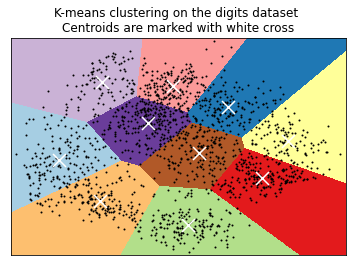

In [19]:

# CLUSTERING VISUALIZATION

data = unlabel

n_samples, n_features = data.shape
n_digits = len(np.unique(y_digits))
labels = y_digits

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

def bench_k_means(estimator, name, data):
    estimator.fit(data)
    
bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)
bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset \n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

COST EFFECTIVENESS

In [20]:
'''
Cost of each label = Rs. 100
Time of each labelling = 1 hour
Accuracy of Clustering ~ 80% (by just having 7.2% of the points labelled)
'''

print('Cost Saving: Rs. ' + str(0.928 * acc/100 * dataset.shape[0] * 100))
print('Time Saving: ' + str(0.928 * acc/100 * dataset.shape[0] * 1) + ' hours')

Cost Saving: Rs. 134543.36197836167
Time Saving: 1345.4336197836167 hours


END OF Q1